# **Causal inference with observational data**
## Difference-in-difference
* Have repeated overvations of the outcome over time? (시계열인가?)
 * yes
* Have a control time series data from a non-treated unit? (대조군이 있는가?)
 * yes
* **More than a handful of obs before and after intervention? (이벤트 전&후에 데이터 많은가?)**
 * **no**
 
$\rightarrow$ 시계열 접근 방법  
$\rightarrow$ Interrupted Time Series analysis 에서 대조군이 있고 이벤트 전후 데이터가 **적을때** 적용할 수 있는 방법 

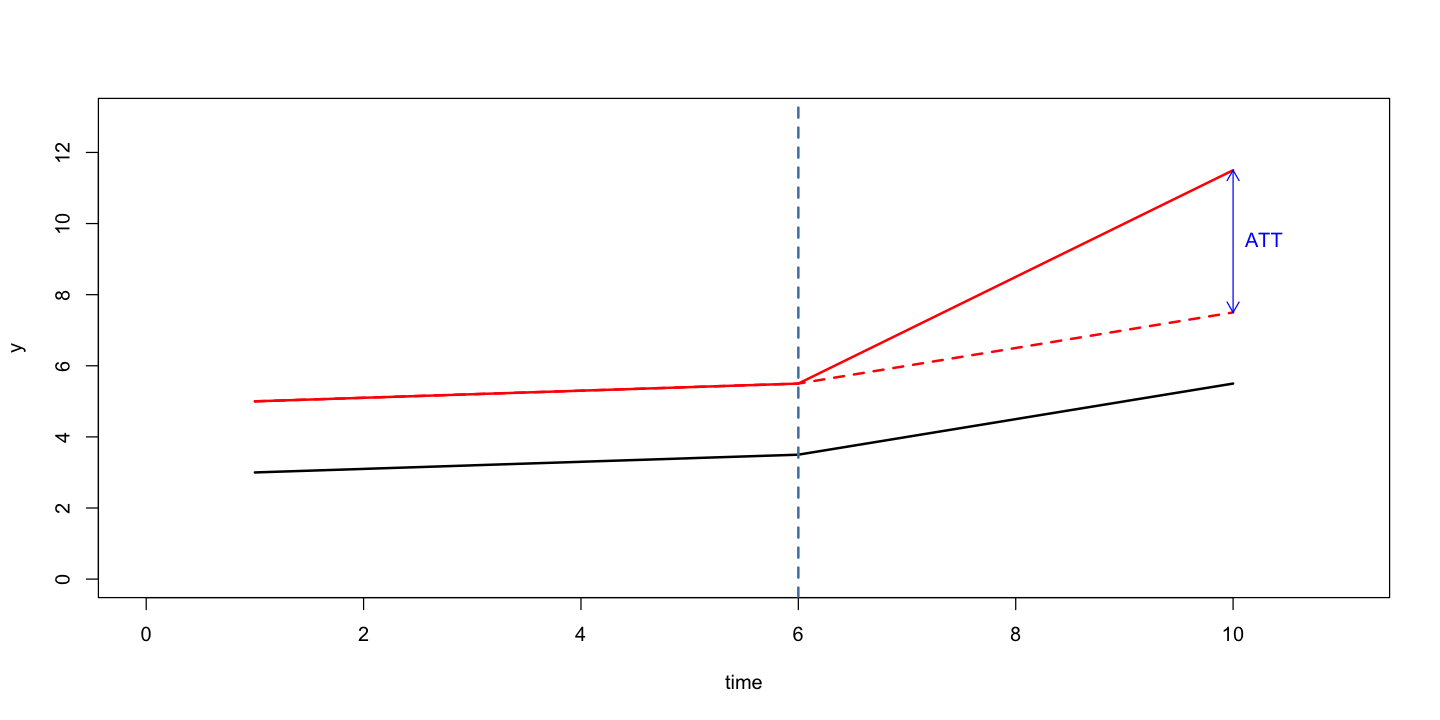

In [23]:
y1<-seq(0,0.5,by=.1)
y2<-c(1,1.5,2,2.5)
y3<-c(2,3.5,5,6.5)
options(repr.plot.width=12, repr.plot.height=6)
plot(c(y1,y2)+3,type='l',ylim=c(0,13),xlim=c(0,11),ylab='y',xlab='time',lwd=2)
lines(c(y1,y3)+5,col='red',lwd=2)
lines(c(y1,y2)+5,col='red',lwd=2,lty=2)
abline(v=6,col='steelblue',lwd=2,lty=2)
arrows(10,7.5,10,11.5,code=3,length=0.1,col='blue')
text(10,9.5,'ATT',pos=4,col='blue')

### ATT(Average effect of treatment on the treated)
$$ATT = \mathbb E [Y^{\text{outcome}}(\text{post})-Y^{\text{counterfactual}}(\text{post})|\text {treated}]$$

### Assumptions
1. Consistency
2. Counterfactual assumption(Parallel Trends)
3. Positive Assumption


### Model

$$y_{igt}=\alpha+T_{igt}\gamma+D_{igt}\eta+\beta\text{TREAT}_{igt} + \varepsilon_{igt},\\ i=1,\ldots,N_g, \ g=1,\ldots, G, \ t=1,\ldots,T.$$

where $i$ indexes individuals, $g$ indexes groups, $t$ indexes time periods, $T_{igt}$ is a row vector of time dummies, $D_{igt}$ is a row vector of group dummies, and $\text{TREAT}_{igt}$ is equal to 1 for boservations that where in a teated group during a teated period and zero otherwise.

$$\mathbf y \equiv 
\begin{bmatrix}
y_1  \\
y_2  \\
\vdots \\
y_G
\end{bmatrix} = \mathbf X \boldsymbol {\beta} + \boldsymbol  {\epsilon} \equiv \begin{bmatrix} X_1\\ X_2\\ \vdots\\ X_G \end{bmatrix} \boldsymbol {\beta} + \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_G \end{bmatrix} , \mathbb E (\epsilon^T\epsilon)=\boldsymbol \Omega= V\sigma^2$$

$$\boldsymbol \Omega = \begin{bmatrix} \Omega_1 & O & \ldots & O \\ O & \Omega_2 & \ldots & O \\ \vdots & \vdots & & \vdots \\ O & O & \ldots & \Omega_G  \end{bmatrix}$$




**$\beta_3$ 관심이 있음 $\rightarrow$ $\boldsymbol \beta$를 추청하고 검정하고 싶음**

하지만 $i$는 시점에 자유로움(독립이 아님) $\rightarrow$ panel data

**$\star$ 분산가정이 위배 되었을때 $\boldsymbol \beta$ 의 추청과 검정을 어떻게 할 것인가?**




### Estimate
* Problem 
 * covariance assumption

#### Estimators
$\mathbb E (\epsilon^T \epsilon)= V\sigma^2$ 일때

* GLS
$$\hat \beta_{GLS} = (X^TV^{-1}X)^{-1}X^TV^{-1}Y$$

$$\mathbb E (\hat \beta_{GLS}) =(X^TV^{-1}X)^{-1}X^TV^{-1}X\beta=\beta$$
$$Var(\hat \beta_{GLS})=(X^TV^{-1}X)^{-1}\sigma^2$$


* OLS
$$\hat \beta_{OLS} = (X^TX)^{-1}X^TY$$

$$\mathbb E (\hat \beta_{OLS}) =(X^TX)^{-1}X^TX\beta=\beta$$
$$Var(\hat \beta_{OLS})=(X^TX)^{-1}\sigma^2$$

$\mathbb E (\epsilon^T\epsilon)=V\sigma^2$ 일때 $\hat \beta_{OLS}$ 는 불편추정량(unbias) 이지만 최량(best)은 아니다.  
$\therefore$ 검정시 문제 발생할 수 있음

### Infernece
#### Methods
1. $V$ 추정하는 방법 
 * Parametric
 * Block Boostrap
 * Empirical Variance-Covariane Matrix
 * Arbitary Variance-Covariance Matrix
2. 무시하는 방법
 * Ignoring Time Series Information
3. **Randomization Inference**

#### **Randomizaion Inference**

* example
| $Y$  | PRE  |  POST | D
|---|---|---|---|
| $Y_1$  | 10 | $\times$  |1|
| $Y_2$ | 8  | $\times$  |1|
| $Y_3$  |9  | $\times$  |1|
| $Y_4$  | $\times$  | 4  |0|
| $Y_5$  | $\times$  | 0  |0|
| $Y_6$  |  $\times$ | 1  |0|

* Key 
under $H_0 :$ PRE, POST 간 효과가 없다 $\Rightarrow D$는 어떤 영향도 주지 않는다.
(under $H_0$ : causal effect가 없다)

| $Y$  | PRE  |  POST | D
|---|---|---|---|
| $Y_1$  | 10 | $\color{red} {10}$ |1|
| $Y_2$ | 8  | $\color{red} {8}$  |1|
| $Y_3$  |9  | $\color{red} {9}$  |1|
| $Y_4$  | $\color{red} {4}$  | 4  |0|
| $Y_5$  | $\color{red} {0}$  | 0  |0|
| $Y_6$  |  $\color{red} {1}$ | 1  |0|



* Step
 1. $D$ 를 re-randomizaion 하여 통계량을 구함, 이때의 $k$번재 통계량을 $\tilde S_k$ 
 2. 가능한 모든 경우의수의 $\tilde S_k$ 를 구함, $k=1,\ldots,\text{모든경우의수}-1$ 
 3. $\tilde S_k$ 와 $S$를 비교하여 $p-value$를 구함, 이때 $S$ 는 re-randomizion 을 하지 않았을 때는 통계량 

$\divideontimes$ 추정치는 ols를 사용하고 검정만 다른 방식으로 수행하는것 같음..

T_stat: 7.333333 
p-value: 0.05263158

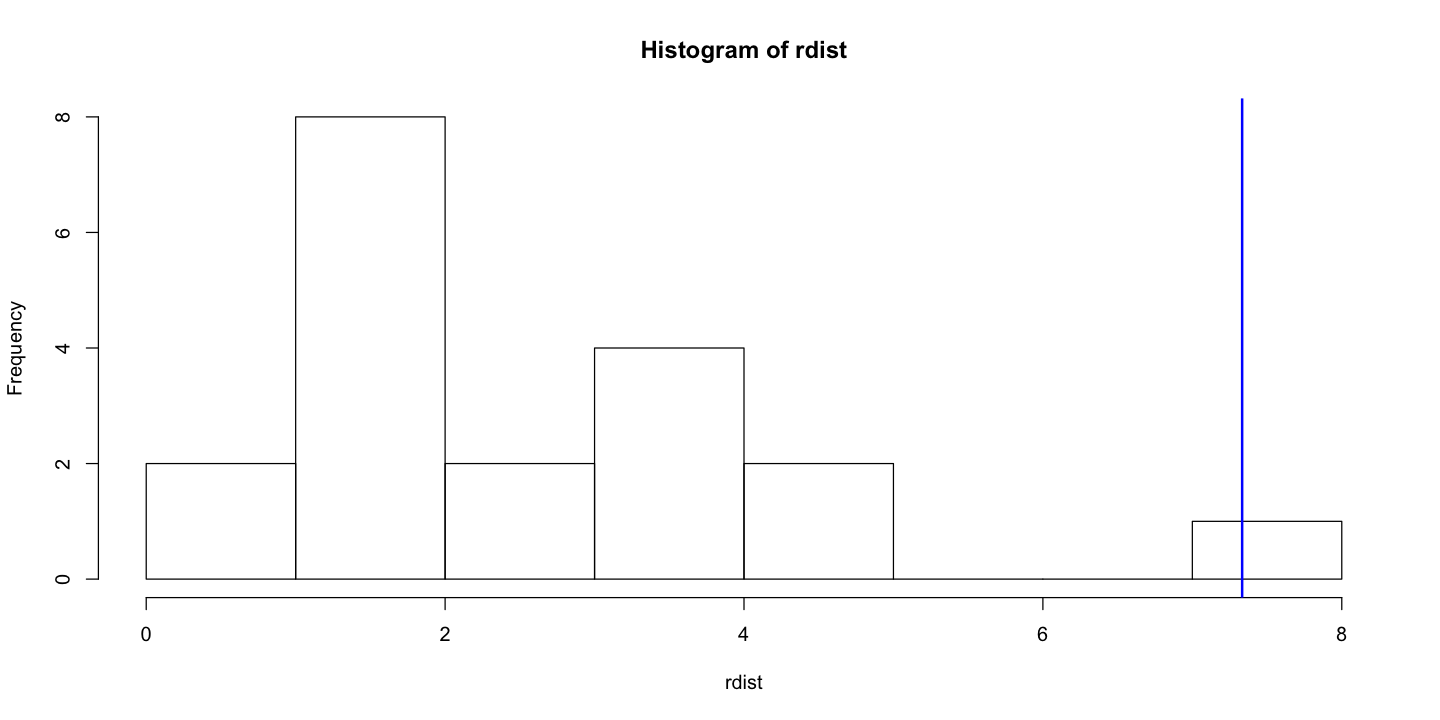

In [411]:
#R.I simple example
library(gtools)
i<-1:6
y<-c(10,8,9,4,0,1)
D<-c(1,1,1,0,0,0)

T_stat<-abs(mean(mean(y[D==1]) - mean(y[D==0])))

diff_mean <- function(index,value){return(abs(mean(value[index])-mean(value[-index])))}

cb<-t(combn(6,3))
rdist<-rep(0,nrow(cb))
for (i in 1:nrow(cb)){
    rdist[i]<-diff_mean(cb[i,],y)
    if(all(which(D==1)==cb[i,])) rdist[i]<-NA
    }

cat('T_stat:',T_stat,'\n')
cat('p-value:',mean(rdist>=T_stat,na.rm=TRUE))

hist(rdist)
abline(v=T_stat,col='blue',lwd=2)


(Intercept)          x1          x2          x3 
  2.9486413   2.3770710   1.6220898   0.7766206

pvalue: 0.0281

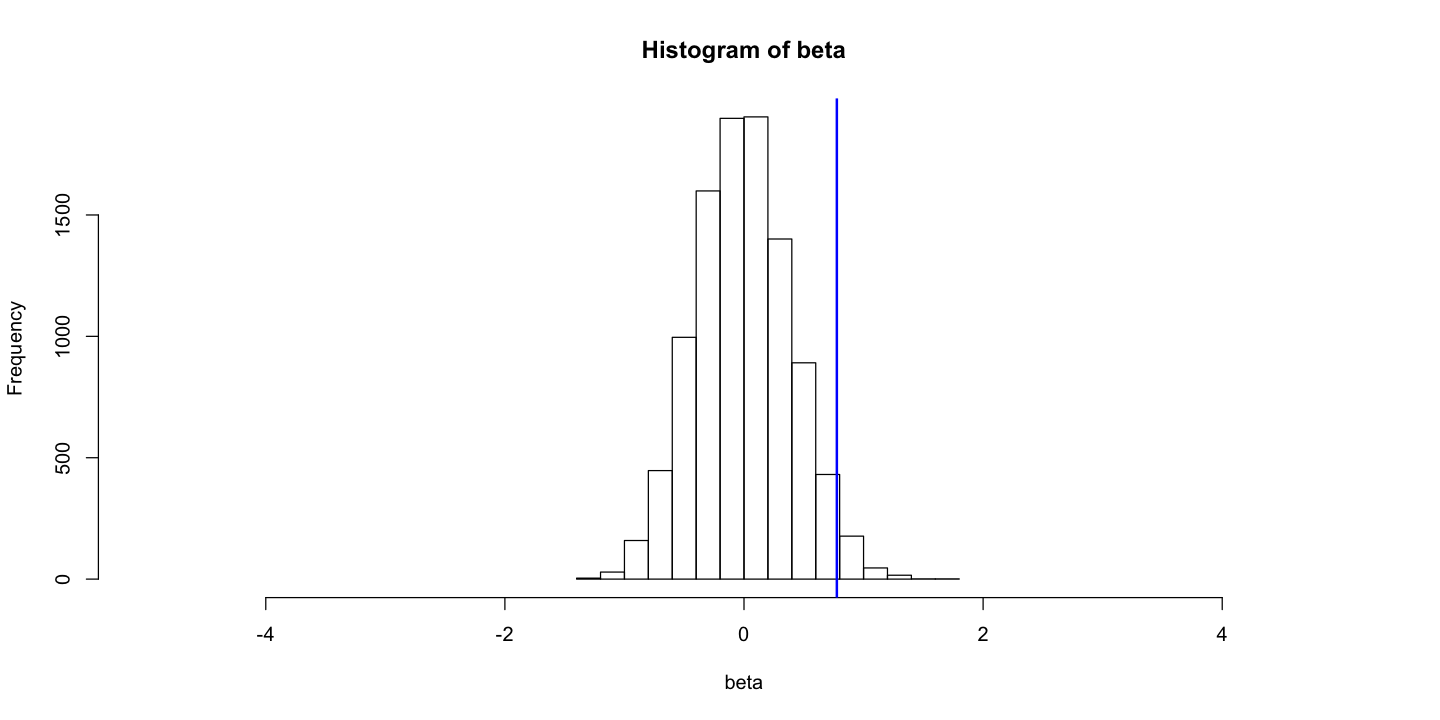

In [412]:
#회귀문제 simulation
#true y=3+2(x1)+1.4(x2)+1.5(x3)
size<-50
x1<-rbinom(size,1,.5)
x2<-rbinom(size,1,0.5)
x3<-x1*x2
beta<-c(3,2,1.4,1.5)
e<-rnorm(size)
y<-cbind(1,x1,x2,x3)%*%beta+e
fit<-lm(y~x1+x2+x3)
fit$coefficients

beta<-c()
iter<-10000
for(i in 1:iter){
x3_re<-rep(0,size)
x3_re[sample(1:size,sum(x3),replace = FALSE)]<-1
beta<-c(beta,lm(y~x1+x2+x3_re)$coefficients[4])
}
hist(beta,xlim=c(-5,5))
abline(v=fit$coefficients[4],col='blue',lwd=2)
cat('pvalue:',mean(beta>=fit$coefficients[4]))


Loading required package: randomizr
Loading required package: estimatr
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Random assignment procedure: Complete random assignment 
Number of units: 7 
Number of treatment arms: 2 
The possible treatment categories are 0 and 1.
The number of possible random assignments is 21.  
The probabilities of assignment are constant across units: 
   prob_0    prob_1 
0.7142857 0.2857143 

term,estimate,two_tailed_p_value
d,6.5,0.3809524


term,estimate,p.value
d,6.5,0.3809524


vs lm


Call:
lm(formula = y ~ d, data = table_2.2)

Residuals:
   1    2    3    4    5    6    7 
-7.5 -1.0  4.0  4.0 -6.0 -1.0  7.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   16.000      2.702   5.922  0.00196 **
d              6.500      5.055   1.286  0.25480   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.042 on 5 degrees of freedom
Multiple R-squared:  0.2485,	Adjusted R-squared:  0.09824 
F-statistic: 1.654 on 1 and 5 DF,  p-value: 0.2548


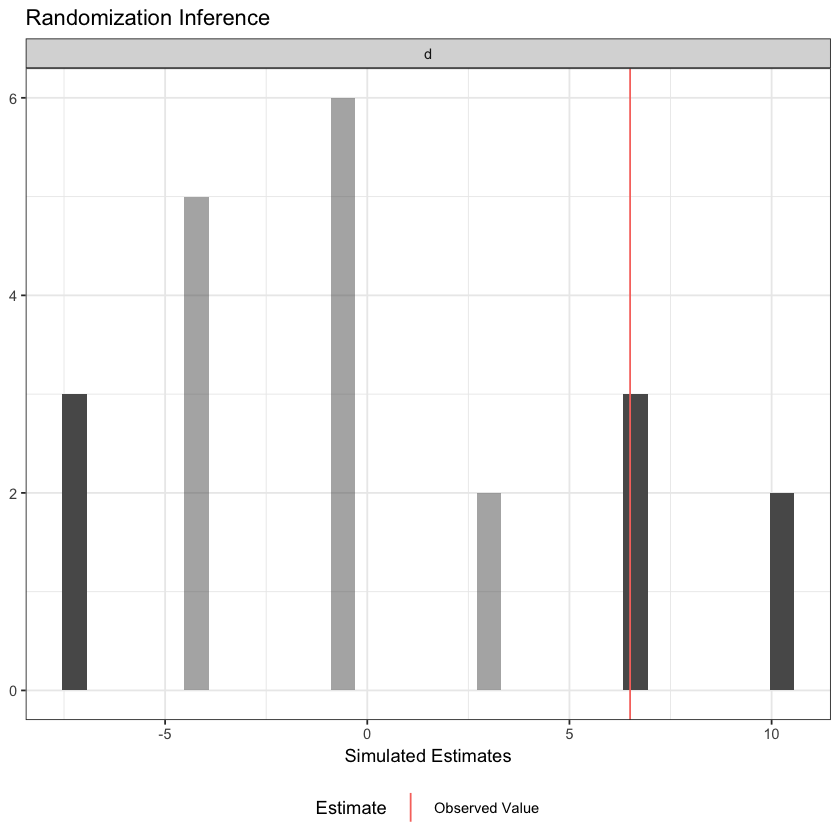

In [112]:
#ri2 packages test
#install.packages('ri2')
library(ri2)
table_2.2 <-data.frame(d = c(1, 0, 0, 0, 0, 0, 1),
                   y = c(15, 15, 20, 20, 10, 15, 30))
declaration <- declare_ra(N = 7, m = 2)
declaration
out <- conduct_ri(y ~ d,
declaration = declaration, assignment = "d", sharp_hypothesis = 0,
data = table_2.2)
    summary(out)
    plot(out)
    tidy(out)

cat("==========================================\n")
cat("vs lm")
summary(lm(y~d,data=table_2.2))

Random assignment procedure: Complete random assignment 
Number of units: 100 
Number of treatment arms: 2 
The possible treatment categories are 0 and 1.
The number of possible random assignments is approximately infinite. 
The probabilities of assignment are constant across units: 
prob_0 prob_1 
   0.5    0.5 

Y,X,Z
0.7283812,0.3028745,0
1.2512532,1.0203219,1
-3.3143236,-0.7299542,1
1.9725150,0.6048821,0
-1.8796235,-0.9629942,0
3.1784234,-0.1340385,0


Z 
-0.3871939

term,estimate,two_tailed_p_value
F-statistic,15.94946,0


term,estimate,upper_p_value
F-statistic,15.94946,0


term,estimate,lower_p_value
F-statistic,15.94946,1


term,estimate,p.value
F-statistic,15.94946,0


vs lm


Call:
lm(formula = Y ~ Z * X, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21036 -0.65738 -0.02191  0.66381  3.08353 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.2290     0.1451   1.578 0.117967    
Z            -0.0182     0.2081  -0.087 0.930498    
X             1.0002     0.1336   7.489 3.38e-11 ***
Z:X           0.8009     0.2006   3.994 0.000127 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.025 on 96 degrees of freedom
Multiple R-squared:  0.6806,	Adjusted R-squared:  0.6707 
F-statistic:  68.2 on 3 and 96 DF,  p-value: < 2.2e-16


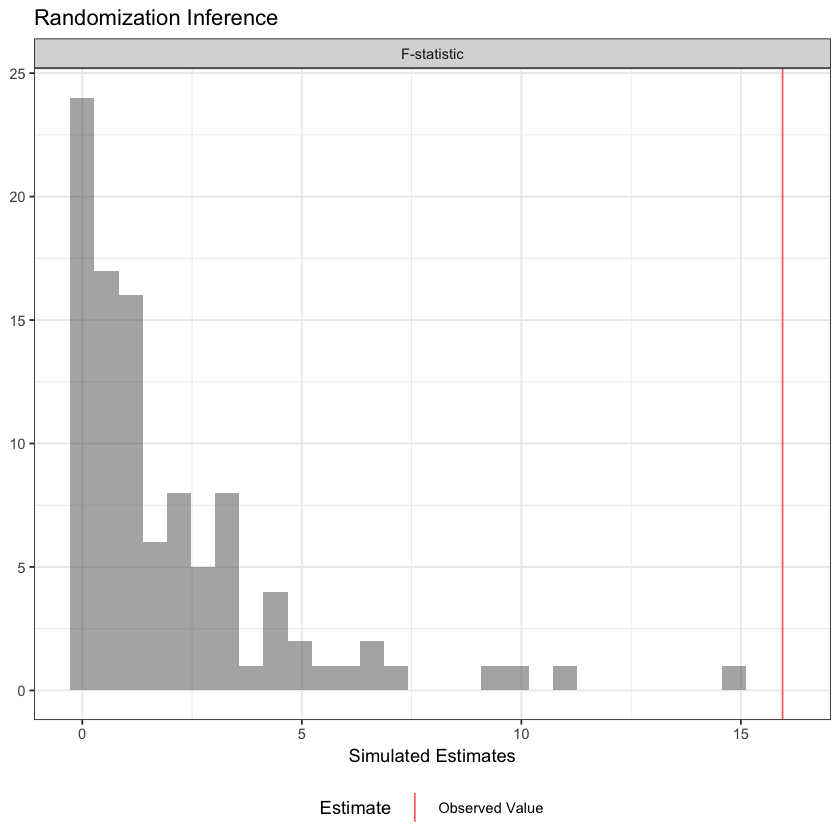

In [113]:
#ri2 packages test
#회귀 문제
#y=0.9*X+0.2*Z+1*X*Z
N <- 100
declaration <- randomizr::declare_ra(N = N, m = 50)
declaration
Z <- randomizr::conduct_ra(declaration)
X <- rnorm(N)
Y <- .9 * X + .2 * Z + 1 * X * Z + rnorm(N) 
dat <- data.frame(Y, X, Z)
head(dat)
ate_obs <- coef(lm(Y ~ Z, data = dat))[2]
ate_obs
out <- conduct_ri(
model_1 = Y ~ Z + X,
model_2 = Y ~ Z + X + Z * X, declaration = declaration, assignment = "Z", sharp_hypothesis = ate_obs, data = dat, sims = 100
)
plot(out)
summary(out, p = "two-tailed") 
summary(out, p = "upper") 
summary(out, p = "lower")
tidy(out)

cat("==========================================\n")
cat("vs lm")
summary(lm(Y ~ Z*X, data = dat))


In [115]:
#ri2 packages test
#ri,lm 비교하기
ripvalue<-c()
lmpvalue<-c()
for(iter in 1 : 100){
N <- 100
declaration <- randomizr::declare_ra(N = N, m = 50)
declaration
Z <- randomizr::conduct_ra(declaration)
X <- rnorm(N)
Y <- .9 * X + .2 * Z + 1 * X * Z + rnorm(N) 
dat <- data.frame(Y, X, Z)
ate_obs <- coef(lm(Y ~ Z, data = dat))[2]
out <- conduct_ri(
model_1 = Y ~ Z + X,
model_2 = Y ~ Z + X + Z * X, declaration = declaration, assignment = "Z", sharp_hypothesis = ate_obs, data = dat, sims = 100
)
lmpvalue<-c(lmpvalue,summary(lm(Y ~ Z*X, data = dat))$coefficients[4,4])
ripvalue<-c(ripvalue,unlist(summary(out, p = "two-tailed")$two_tailed_p_value))
}
cat('lm : ',sum(lmpvalue<=0.05),'\n')
cat('R.I : ',sum(ripvalue<=0.05),'\n')


lm :  100 
R.I :  100 


# Referrence
[1] [Using Causal Inference to Improve the Uber User Experience(2019)](https://eng.uber.com/causal-inference-at-uber/)  
[2] [HOW MUCH SHOULD WE TRUST DIFFERENCES-IN-DIFFERENCES ESTIMATES?(2004)](https://www.nber.org/papers/w8841.pdf)  
[3] [Randomization Inference for Difference-in-Differences with Few Treated Clusters(2019)](http://qed.econ.queensu.ca/working_papers/papers/qed_wp_1355.pdf)

# Appendix

In [118]:
#OLS 망치기 (데이터 생성방식이 정확한지 확실하지 않음....)
#true y=1+2*(x1)+3*(x2)+1*(x1*x2)

size<-100
Omega <- diag(runif(size,1,5))
gamma<-.4
tmp<-c()
for(i in 1:(size-1))
  for(j in i:1){
    tmp<-c(tmp,gamma^j)
  }
Omega[upper.tri(Omega)]<-tmp
Omega<-Omega+t(Omega)-diag(diag(Omega))
#오차항 1차 자기상관 분산가정  V
value<-eigen(Omega)$value
vector<-eigen(Omega)$vector
K<-vector%*%diag(value^.5)
#Omega = KK'

beta<-c(1,2,3,1)
x1<-c(rep(0,50),rep(1,50))
x2<-c(rep(0,25),rep(1,25),rep(0,25),rep(1,25))
#x1<-rbinom(size,1,0.5)
#x2<-rbinom(size,1,0.5)
x3<-x1*x2
x<-cbind(1,x1,x2,x3)
e<-rnorm(size)
y<-x%*%beta +e
#Z<-K%*%x
Z<-x
E<-K%*%e
#Y<-K%*%y
Y<-Z%*%beta+E
#따라서 오차항 분산은 V
olsFit<-lm(Y~Z-1)
#간단한 형태의 가중치
#hat_u<-lm(Y~Z-1)$residual
#hat_g<-lm(log(hat_u^2)~Z-1)
#hat_w<-exp(hat_g$fitted.values)
fglsFit<-lm(Y~Z-1,weights = 1/olsFit$residual^2)
cat("OLS==========================================\n")
summary(olsFit)
cat("FGLS==========================================\n")
summary(fglsFit)


OLS==========================================



Call:
lm(formula = Y ~ Z - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1331 -1.2184  0.0881  1.0890  4.3961 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
Z     0.6716     0.3275   2.051    0.043 *  
Zx1   2.2612     0.4632   4.882 4.19e-06 ***
Zx2   3.5731     0.4632   7.714 1.14e-11 ***
Zx3   0.5617     0.6551   0.857    0.393    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.638 on 96 degrees of freedom
Multiple R-squared:  0.8821,	Adjusted R-squared:  0.8771 
F-statistic: 179.5 on 4 and 96 DF,  p-value: < 2.2e-16


FGLS==========================================



Call:
lm(formula = Y ~ Z - 1, weights = 1/olsFit$residual^2)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.2448 -1.0371  0.3021  0.9517  0.9911 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
Z    0.70563    0.06709  10.518  < 2e-16 ***
Zx1  2.26631    0.15747  14.392  < 2e-16 ***
Zx2  3.63509    0.08481  42.862  < 2e-16 ***
Zx3  0.50267    0.18567   2.707  0.00803 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1 on 96 degrees of freedom
Multiple R-squared:  0.9935,	Adjusted R-squared:  0.9933 
F-statistic:  3695 on 4 and 96 DF,  p-value: < 2.2e-16


In [129]:
#1000반복(유의수준 5%)
iter<-1000
olsPvalue<-c()
fglsPvalue<-c()
for(i in 1:iter){
x1<-rbinom(size,1,0.5)
x2<-rbinom(size,1,0.5)
x3<-x1*x2
x<-cbind(1,x1,x2,x3)
e<-rnorm(size)
y<-x%*%beta +e
    
#Z<-K%*%x
Z<-x
E<-K%*%e
#Y<-K%*%y
Y<-Z%*%beta+E
olsFit<-lm(Y~Z-1)
#hat_u<-olsFit$residual
#hat_g<-lm(log(hat_u^2)~Z-1)
#hat_w<-exp(hat_g$fitted.values)
fglsFit<-lm(Y~Z-1,weights = 1/olsFit$residual^2)
#fglsFit<-lm(Y~Z-1,weights = hat_w)
olsPvalue<-c(olsPvalue,summary(olsFit)$coefficients[4,4])
fglsPvalue<-c(fglsPvalue,summary(fglsFit)$coefficients[4,4])
}

cat("OLS reject 횟수 : ",sum(olsPvalue<=0.05),'\n')
cat("FGLS reject 횟수 : ",sum(fglsPvalue<=0.05))


OLS reject 횟수 :  280 
FGLS reject 횟수 :  887


Call:
lm(formula = Y ~ Z - 1)

Coefficients:
    Z    Zx1    Zx2    Zx3  
1.014  1.830  3.199  1.191  


pvalue: 0.003

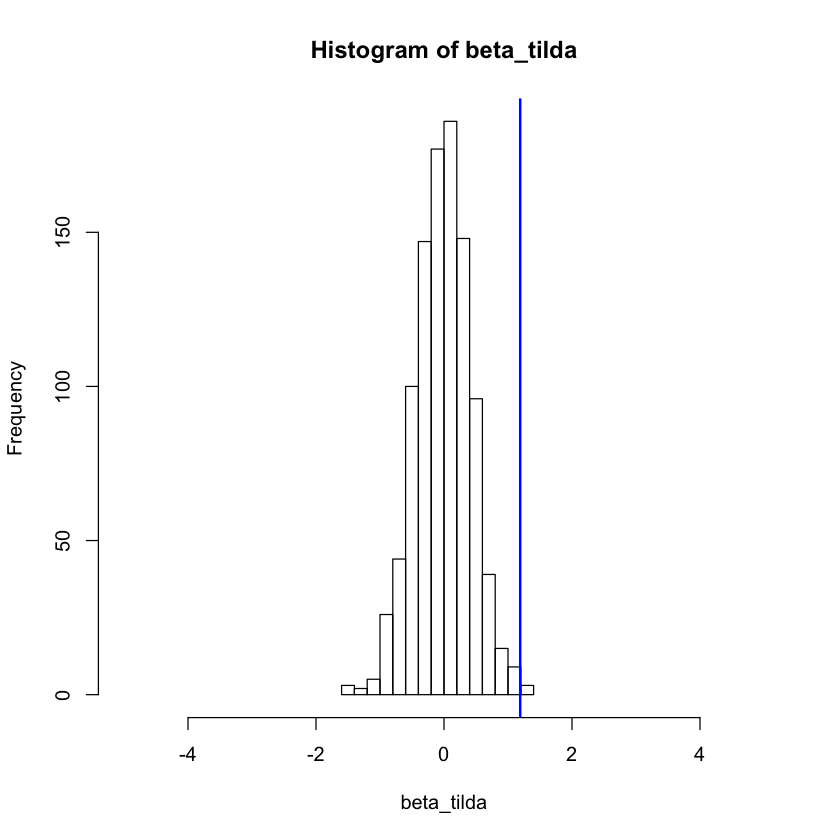

In [130]:
#R.I 적용

beta_tilda<-c()
sample<-1000
for(i in 1:sample){
x3_re<-Z[,4]
x3_re<-sample(x3_re,size,replace = FALSE)
Z_re<-Z
Z_re[,4]<-x3_re
beta_tilda<-c(beta_tilda,lm(Y~Z_re-1)$coefficients[4])
}
lm(Y~Z-1)
hist(beta_tilda,xlim=c(-5,5))
abline(v=lm(Y~Z-1)$coefficients[4],col='blue',lwd=2)
cat('pvalue:',mean(beta_tilda>=lm(Y~Z-1)$coefficients[4]))